In [62]:
import numpy as np 
import torch
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision import transforms

In [63]:
train_dataset = torchvision.datasets.FashionMNIST(root='./', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./', train=False, download=True, transform=transforms.ToTensor())

In [64]:
train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [65]:
train_labels = train_dataset.targets
test_labels = test_dataset.targets

train_dataset = train_dataset.data
test_dataset = test_dataset.data

In [66]:
# sample data before formatting
train_dataset[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [67]:
def format(data):
    d = data.view(len(data), -1)
    d = (d > 127).to(torch.int)
    
    return d

In [68]:
train_data = format(train_dataset)
test_data = format(test_dataset)

In [69]:
# sample data after formatting
train_data[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [70]:
train_data = TensorDataset(train_data)
train_data = DataLoader(train_data, 100, shuffle=False)

test_data = TensorDataset(test_data)
test_data = DataLoader(test_data, 100, shuffle=False)

In [81]:
# Model

class RBM:
    def __init__(self, visual_dim, hidden_dim):
        self.visual_dim = visual_dim # visual dimension - 784
        self.hidden_dim = hidden_dim # Hidden dimension - can be changed
        
        self.w = np.random.randn(self.visual_dim, self.hidden_dim)
        self.v = np.ones(self.visual_dim) # bias vector for visual nodes
        self.h = np.ones(self.hidden_dim) # bias vector for hidden nodes
        
    def logistic(self, x):
        """
            Computes the sigmoid of the input x
        """
        return 1 / (1 + np.exp(-x))
        
    def train(self, data, k, max_epochs, lr=0.1):
        """
            data: Training data: (N, 784)
            k: decides the number of steps of Gibbs Sampling
            max_epochs: Number of Training epochs
            lr: learning rate
        """
        # count = 0
        prev_loss = float('inf')
        for epoch in range(max_epochs):
            epoch_loss = 0.0
            
            for batch in data:
                # count+= 1
                batch_loss = 0.0
                batch = batch[0].numpy()
                # Positive phase:
                """
                    Sampling the hidden states given the visible values; hidden states sampled from the 
                    True distribution of the data.
                """
                hidden_activations = np.matmul(batch, self.w) + self.h
                hidden_prob = self.logistic(hidden_activations)
                
                hidden_states = hidden_prob > np.random.rand(len(batch), self.hidden_dim)
                
                h_states = hidden_states.copy()
                # Negative Phase
                for i in range(k):
                    visible_activations = np.matmul(h_states, self.w.T) + self.v
                    visible_prob = self.logistic(visible_activations)
                    visible_states = (visible_prob > np.random.rand(len(batch), self.visual_dim)).astype(float)
                    
                    neg_hidden_activations = np.matmul(visible_states, self.w) + self.h
                    neg_hidden_prob = self.logistic(neg_hidden_activations)
                    
                    h_states = (neg_hidden_prob > np.random.rand(len(batch), self.hidden_dim)).astype(float)
                
                pos_associations = np.dot(batch.T, hidden_prob)/ len(batch) # could use hidden_states as well
                neg_associations = np.dot(visible_states.T, neg_hidden_prob)/ len(batch) # could use the neg_hidden_states as well
                
                # update weights
                dw = pos_associations - neg_associations
                dv = np.mean(batch - visible_states)
                dh = np.mean(hidden_prob - neg_hidden_prob)
                
                self.w+= lr*dw
                self.v+= lr*dv
                self.h+= lr*dh
                
                batch_loss = np.mean((batch - visible_prob)**2)
                epoch_loss+= batch_loss
                # print(f"Batch loss: {batch_loss}")
                
            # step size adaptation
            if prev_loss < epoch_loss:
                lr = lr / 2 # step size reduction by 2
            prev_loss = epoch_loss
            
            print("Epoch %s: error is %s" % (epoch, epoch_loss))
            # print(f"Batch Count: {count}")
    
    def compute_hidden(self, data):
        """
        Considering the weights of RBM are tweaked, given a set of visible units sample the hidden units.
        data: format(test_dataset) - > shape: 10000, 784
        """
        
        Hidden = []
        
        for sample in data:
            sample = sample.unsqueeze(0).numpy()
            
            hidden_activations = np.matmul(sample, self.w) + self.h
            hidden_prob = self.logistic(hidden_activations)
            
            hidden_states = (hidden_prob > np.random.rand(len(sample), self.hidden_dim)).astype(float)
            
            Hidden.append(hidden_states)
        
        r = torch.stack([torch.from_numpy(arr) for arr in Hidden], dim=0)
        
        return r

    def compute_visible(self, data):
        """
        Considering the weights of RBM are tweaked, given a set of hidden units , re-sample the visible units.
        data: - > shape: len, hidden_dim
        """

        Visible = []
        for sample in data:
            sample = sample.unsqueeze(0).numpy()
            
            neg_visible_activations = np.matmul(sample, self.w.T) + self.v
            neg_visible_prob = self.logistic(neg_visible_activations)
            
            neg_visible_states = (neg_visible_prob > np.random.rand(len(sample), self.visual_dim)).astype(float)
            
            Visible.append(neg_visible_states)
            
        v = torch.stack([torch.from_numpy(arr) for arr in Visible], dim=0)
        
        return v


In [82]:
model = RBM(784, 256)
model.train(train_data, 1, 10)

Epoch 0: error is 64.64648832381276
Epoch 1: error is 53.68900316244432
Epoch 2: error is 52.231684728212656
Epoch 3: error is 51.24011333137828
Epoch 4: error is 50.63641217061732
Epoch 5: error is 50.281134359845886
Epoch 6: error is 50.03169272724546
Epoch 7: error is 49.907983519977364
Epoch 8: error is 49.81852107983874
Epoch 9: error is 49.73689065587999


In [83]:
hidden = model.compute_hidden(format(test_dataset)).squeeze(1)
hidden.shape

torch.Size([10000, 256])

In [84]:
# Computing the Test error
grnd_truth = format(test_dataset).numpy()
visible = model.compute_visible(hidden).squeeze(1).numpy()

test_error = np.mean((grnd_truth - visible)**2)
print(f"Test Error: {test_error}")

Test Error: 0.17470701530612245


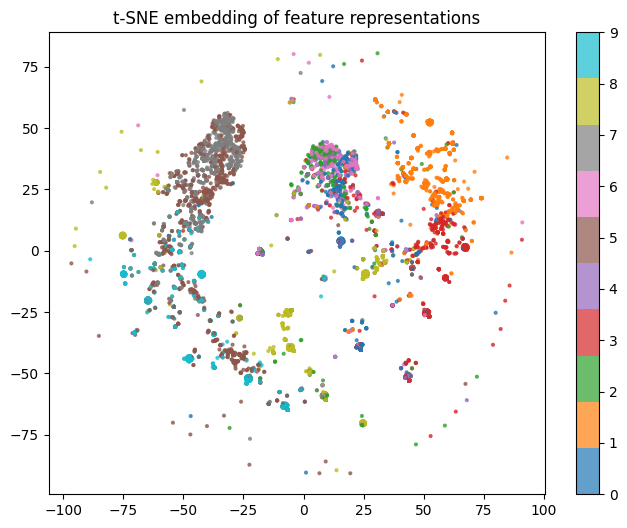

In [92]:
# Obtaining the TSNE visualization of the hidden states
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assume these are your tensors
# features -> (10000, 256)
# labels   -> (10000,)

features_np = hidden.numpy()
labels_np   = test_labels.numpy()

# Run TSNE
tsne = TSNE(
    n_components=2,
    learning_rate='auto',
    init='pca',
    perplexity=30,
    random_state=42
)

embeddings = tsne.fit_transform(features_np)   # shape (10000,2)

# Visualize
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    embeddings[:,0], embeddings[:,1],
    c=labels_np, s=4, alpha=0.7, cmap='tab10'
)
plt.colorbar(scatter)
plt.title("t-SNE embedding of feature representations")
plt.show()
